# Analysis and Visualisation: NBA Trends

In this project, we’ll analyse and visualise data from  NBA (National Basketball Association) and explore possible associations.

Note: this dataset has been already preprocessed. To  make things more transparent and brief, there are only 5 teams included: **"Knicks"**, **"Celtics"**, **"Thunder"**, **"Spurs"**, **"Nets"**.

Columns description: 

- `game_id`: an identification number of a game;
- `year_id`: a year the game played;
- `fran_id`: a host's franchise identification name; 
- `opp_fran`: an opponent's franchise identification name;
- `game_location`: a code to mark game locations (`H` - home, `A` - away);
- `is_playoffs`: a code to mark whether the game is a playoff - a final game or a series of games played to break a tie (`1` - playoff, `0` - not a playoff);
- `pts`: host's points;
- `opp_pts`: opponent's points;
- `game_result`: a code to mark result of a game for a host (`W` - won, `L` - lost);
- `forecast`: chances for winning (closer to 0 - losing, closer to 1 - winning);
- `point_diff`: a difference in points between a host and an opponent.

### Analysing relationships between Quantitative and Categorical

First, let's import necessary libraries and upload `nba_games.csv` to `nba` variable. 


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


nba = pd.read_csv('nba_games.csv')

Let's start with smaller slice of the dataset: games of the year 2010.

In [3]:
# Subset Data of 2010 
nba_2010 = nba[nba.year_id == 2010]
nba_2010.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
21722,200910280SAS,2010,Spurs,Pelicans,H,0,113,96,W,0.747176,17
21723,200910290CHI,2010,Spurs,Bulls,A,0,85,92,L,0.440765,-7
21724,200910300BOS,2010,Celtics,Bulls,H,0,118,90,W,0.768774,28
21725,200910300CHA,2010,Knicks,Hornets,A,0,100,102,L,0.299804,-2
21726,200910300DET,2010,Thunder,Pistons,A,0,91,83,W,0.255529,8


In [4]:
nba.groupby('game_id').size()[nba.groupby('game_id').size() > 1]
nba[nba.game_id == '194612070BOS']

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
29,194612070BOS,1947,Celtics,Knicks,H,0,65,90,L,0.483289,-25
30,194612070BOS,1947,Knicks,Celtics,A,0,90,65,W,0.516711,25


Suppose we want to compare average number of points per game for **"Knicks"** and **"Nets"** in 2010.

In [5]:
# Knicks points in 2010
knicks_pts = nba_2010.pts[nba_2010.fran_id == 'Knicks']
knicks_pts

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64

In [6]:
# Nets points in 2010
nets_pts = nba_2010.pts[nba_2010.fran_id == 'Nets']
nets_pts

21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64

Let's check difference between their means.

In [7]:
# Difference between Knicks and Nets averages
diff_means_2010 = knicks_pts.mean() - nets_pts.mean()
diff_means_2010

9.731707317073173

Result: **"Knicks"** have almost 10 points more on average than **"Nets"**.

Now we are going to visualise points of **"Knicks"** and **"Nets"** in 2010 as overlapping histograms to see distribution of their points compared to each other. 

In [8]:
# Filter slice of a year 2010 so it contains only 2 teams
knicks_nets_2010 = nba_2010[(nba_2010.fran_id == 'Knicks') | (nba_2010.fran_id == 'Nets')]

In [9]:
# Create overlapping histplot function
def visualise_histplotoverlap(dataset, palette, title, xlabel, ylabel, legend_labels, legend_title):
    # Prepare grid
    plt.figure(figsize = (15,10))

    # Plot a histogram
    ax = sns.histplot(
        dataset, 
        x=dataset.pts, 
        hue=dataset.fran_id, 
        stat="count", 
        legend=True, 
        palette= palette)

    # Add descriptions
    ax.legend(title=legend_title, 
    title_fontsize='large', 
    loc='best', 
    labels=legend_labels, 
    fontsize = 'large')

    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

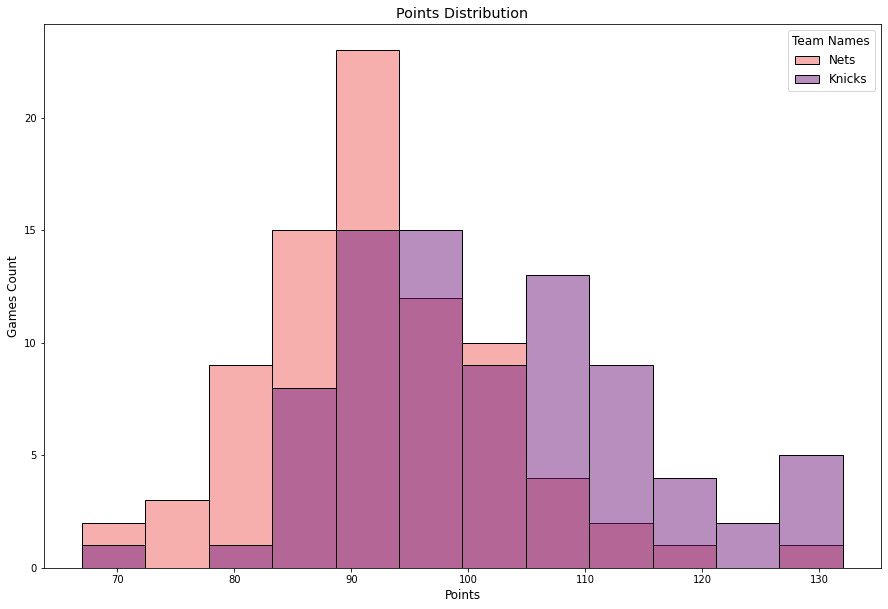

In [10]:
# Call overlapping histplot function
visualise_histplotoverlap(
    knicks_nets_2010, 
    palette= 'magma', 
    title='Points Distribution', 
    xlabel='Points', 
    ylabel='Games Count', 
    legend_labels=['Nets', 'Knicks'], 
    legend_title='Team Names')

Result: **"Knicks"** results are better in general, although **"Nets"** have more than 20 games with about 90 points. 

As a second step we are going to visualise points of **"Knicks"** and **"Nets"** in 2010 as boxplots to see distribution of their points compared to each other with median (black line on the boxes) and mean (black cross on the boxes). 

In [11]:
# Create boxplot function
def visualise_boxplot(dataset, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        x= dataset.fran_id, 
        y= dataset.pts,
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"})

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

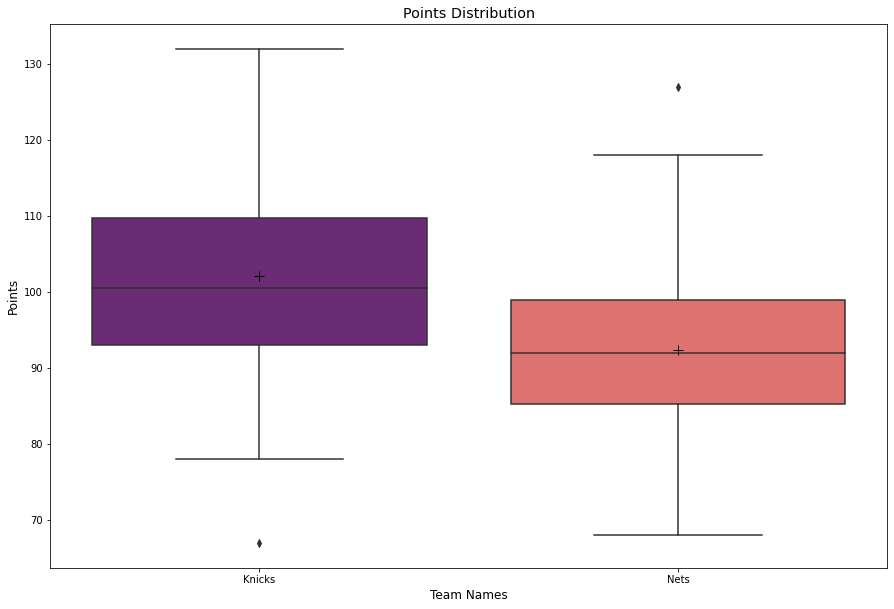

In [12]:
# Call boxplot function
visualise_boxplot(
    knicks_nets_2010, 
    palette='magma', 
    title='Points Distribution', 
    xlabel='Team Names', 
    ylabel='Points')

Result: 
- On a boxplot it is more apparent that **"Knicks"** results in 2010 are better, because significant part of their points (the box itself) is located in the area of higher points `95-110`.
- The spread of general points for **"Knicks"** is observed from `~80` to `~130`, for **"Nets"** - from `~70` to `~120`
- Median and mean are close to each other on both plots.
- Each team has only one outlier, **"Knicks"** around `70` points, **"Nets"** - `~125`.


Now we will visualise points of **"Knicks"** and **"Nets"** via line plot over years.

In [13]:
# Filter slice of over years so it contains only 2 teams
knicks_nets_all_years = nba[(nba.fran_id == 'Knicks') | (nba.fran_id == 'Nets')]

In [14]:
# Create lineplot function
def visualise_lineplot(dataset, palette, title, xlabel, ylabel, legend_title):
    # Prepare grid
    plt.figure(figsize = (15,10))
    # Create lineplot
    ax = sns.lineplot( 
        x=dataset.year_id, 
        y=dataset.pts, 
        hue=dataset.fran_id,  
        palette= palette,
        legend=True)

    # Add descriptions
    ax.legend(title=legend_title, 
    title_fontsize='large', 
    loc='best',
    fontsize = 'large') 

    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

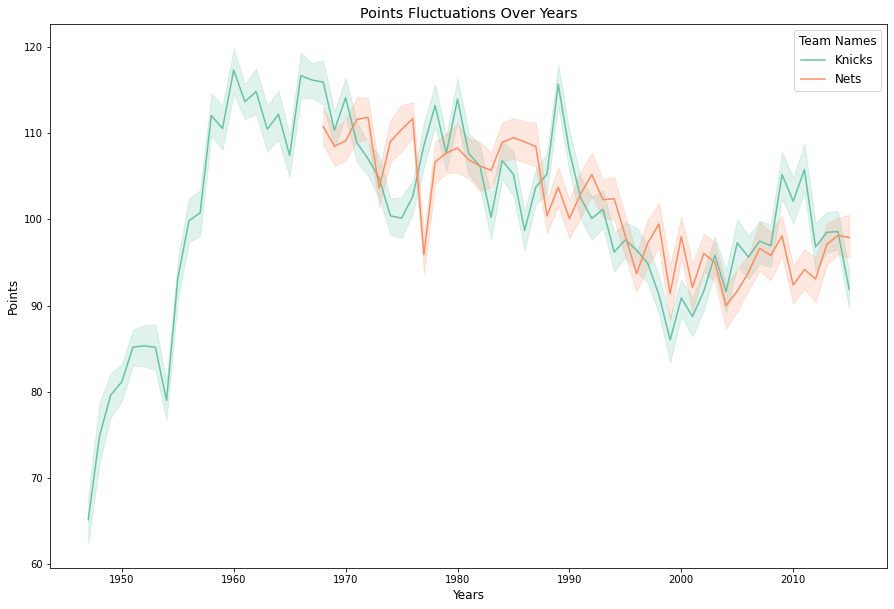

In [15]:
# Call lineplot function
visualise_lineplot(
    knicks_nets_all_years, 
    palette='Set2', 
    title='Points Fluctuations Over Years', 
    xlabel='Years', 
    ylabel='Points',  
    legend_title='Team Names')

Result: 

-  **"Knicks"** data starts about 20 years before **"Nets"**, so we see their progress from around `65`points to significant peak of `120` points. 
- After the peak we see fluctuations of medium magnitude, with some falls to `100-110` points. 
- Most significant fall to the level of `90-95` points was from the middle of the 90s to the middle of the 2000s.
- In 2005-2015 **"Knicks"**  results became a bit better and have  almost reached `100-110` points, but later fall again and it's not clear how bad, because there are no data.
- **"Nets"** have approximately the same fluctuation magnitude from the formation of the team in the late 60s, but their "starting points" are much better - around `110`. Nevertheless they also have similar to **"Knicks"** decline with slightly better fluctuations `90-100` during the middle of the 90s to the middle of the 2000s.
- After 2005 **"Nets"** points continued their fluctuations but on the lower level around `90-100` points.


Let's see what we'll see on the line plot with points of all available teams over years. 

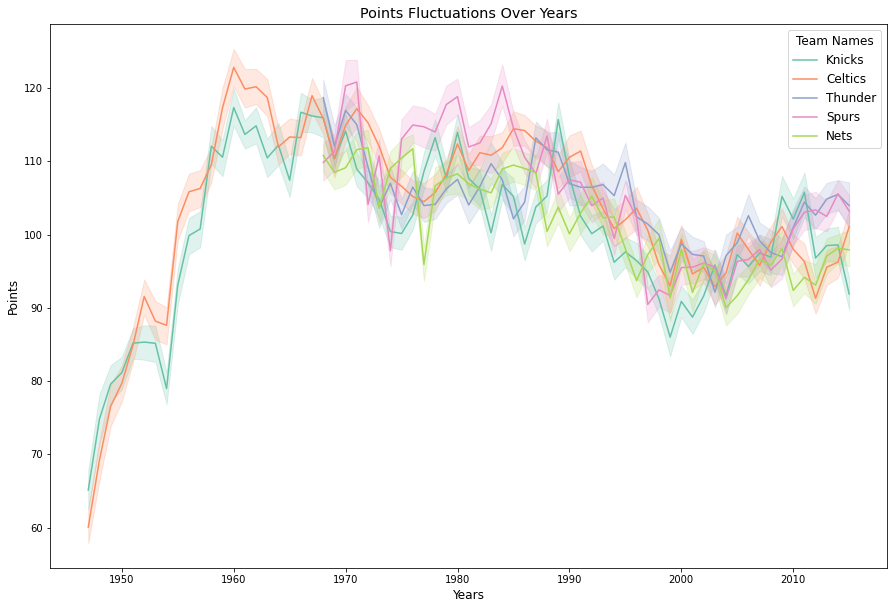

In [16]:
# Call lineplot function
visualise_lineplot(
    nba, 
    palette='Set2', 
    title='Points Fluctuations Over Years', 
    xlabel='Years', 
    ylabel='Points',  
    legend_title='Team Names')


Interesting enough, general pattern of rises and falls is very similar for all 5 teams: 
- all of them had more or less good times from the late 60s to the 90s; - after that everyone got caught up in some crisis from 95 to 2005, which passed in a mild or acute form for each, but one way or another, all were involved;
- from 2005  everyone started slowly but steadily rise again but with many fluctuations: **"Knicks"**, **"Celtics"** and **"Nets"** weren't as good as others, although **"Knicks"** had couple of peaks around 2010. 
- **"Thunder"**, **"Spurs"** are doing much better than others getting around `100-105` points in the 2010s. 

Let's see the same results but now each team on a separate plot. 

In [17]:
def visualise_facetplot(dataset, col, hue, palette, xcolumn, ycolumn, xlabelx, ylabel, legend_title):
    # Create grid
    g = sns.FacetGrid(
        data=dataset, 
        col=col, 
        col_wrap=3, 
        height=4, 
        aspect=1.5, 
        hue=hue, 
        palette=palette,
        sharex=False, 
        sharey=True,
        legend_out=True)
    
    # Add plots to grid
    g.map(sns.lineplot, xcolumn, ycolumn).add_legend(
        title=legend_title, 
        title_fontsize='large', 
        fontsize = 'medium')

    # Add labels
    g.set_axis_labels(xlabelx, ylabel)

    return plt.show()

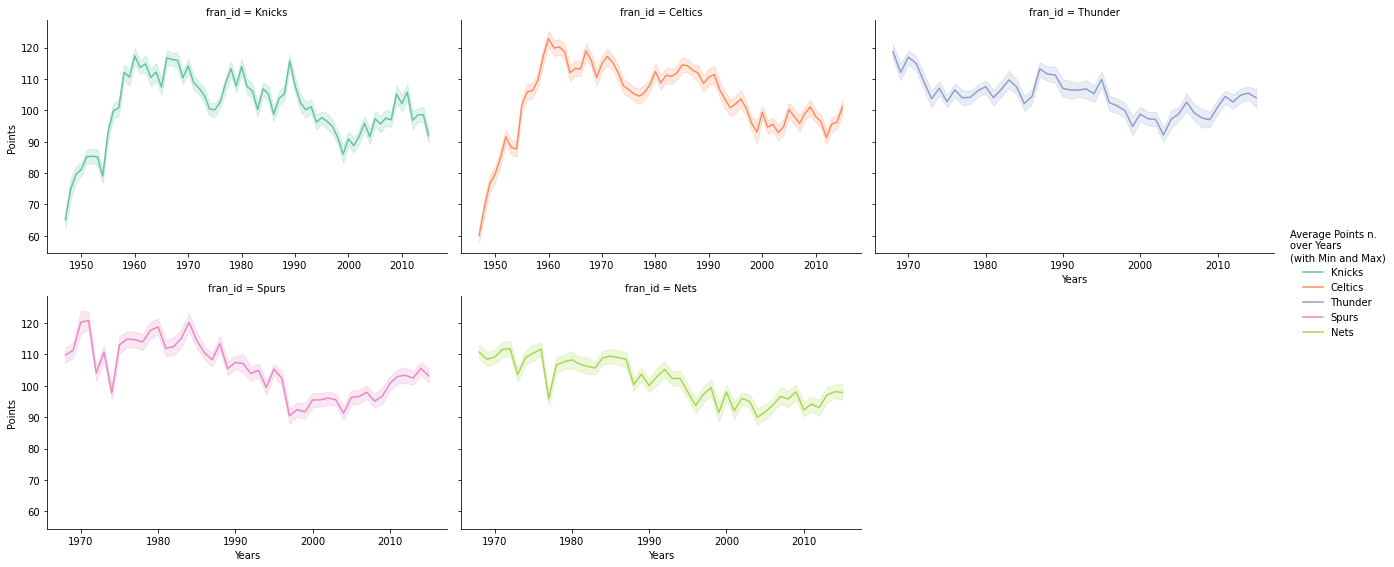

In [18]:
visualise_facetplot(
    nba,  
    col='fran_id',
    hue='fran_id', 
    palette='Set2', 
    xcolumn='year_id', 
    ycolumn='pts', 
    xlabelx="Years", 
    ylabel="Points",
    legend_title = 'Average Points n.\nover Years\n(with Min and Max)')

So, whose general results in points are better regardless of timeline? Let's display all teams on as boxplots to compare. 

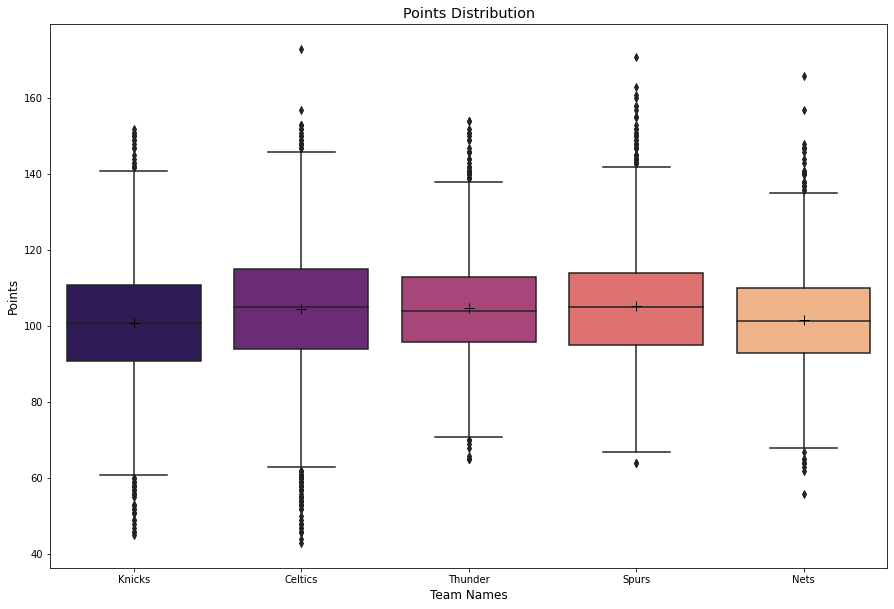

In [19]:
# Call boxplot function
visualise_boxplot(
    nba, 
    palette='magma', 
    title='Points Distribution', 
    xlabel='Team Names', 
    ylabel='Points')

Result: 
- Seems like **"Celtics"** have a bit better general result by points, but **"Spurs"** are very close and have many outliers with a high number of points, while **"Celtics"** have the maximum number of outliers with the low number of points. 
- **"Thunder"** have the most stable at the same time rather good level: their box plot and its lines are located most compactly and quite high on the points scale. 
- **"Knicks"** are a bit better than **"Nets"** by the main number of high points (the box itself), but has more low points outliers, while **"Nets"**, on the contrary, have more outliers with high points. Both teams are located lower than other teams on the general points scale. 

Note: **"Knicks"** and **"Celtics"** played much more games than others and started from meagre points compared to modern standards, so their results are skewed. Let's try to fix it to better understand whose results are relatively better among those five teams, but not only in points but also over years. 

To mitigate skewness we are going to compare the mean number of points each of the 5 teams got in all their games over 1 year (with min & max borders), not relative to each other, but rather relative to the average points number of all games of all teams per year. 

To calculate this mean value we are going to use not only the points of the 5 teams, that we know, but also their opponents, mentioned in `opp_pts`. 

As a results we'll see which team plays better or worse than average, even if the average itself was significantly lower in the past and in general fluctuates each year.

In [20]:
mean_pts_per_year = nba.groupby('year_id').mean(['pts', 'opp_pts'])
mean_pts_per_year['mean_pts'] = mean_pts_per_year[['pts', 'opp_pts']].mean(axis=1)
mean_pts_per_year

,is_playoffs,pts,opp_pts,forecast,point_diff,mean_pts
year_id,,,,,,
1947,0.040000,62.712000,64.928000,0.453431,-2.216000,63.820000
1948,0.058824,72.009804,72.480392,0.456245,-0.470588,72.245098
1949,0.047619,78.142857,78.817460,0.460842,-0.674603,78.480159
1950,0.035461,80.446809,80.581560,0.490101,-0.134752,80.514184
1951,0.105960,85.046358,85.317881,0.481621,-0.271523,85.182119
...,...,...,...,...,...,...
2011,0.080717,100.874439,99.165919,0.552507,1.708520,100.020179
2012,0.151671,97.593830,95.095116,0.549436,2.498715,96.344473
2013,0.122318,99.824034,95.680258,0.609674,4.143777,97.752146


In [21]:
nba['perc_from_mean'] = nba.apply(lambda x: x.pts / mean_pts_per_year.mean_pts[x.year_id] * 100 - 100, axis=1)

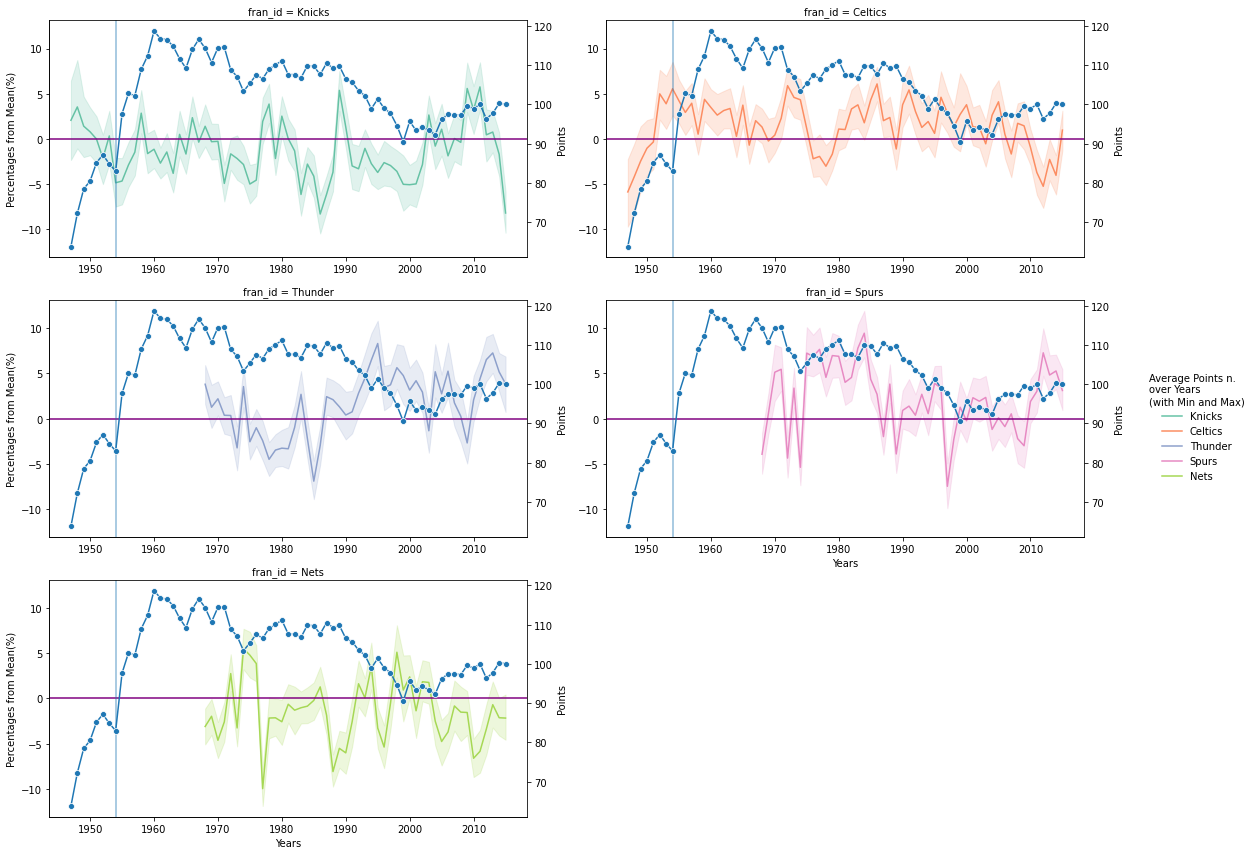

In [36]:
# Create grid
g = sns.FacetGrid(
    data=nba, 
    col='fran_id', 
    col_wrap=2, 
    height=4, 
    aspect=2, 
    hue='fran_id', 
    palette='Set2',
    sharex=False, 
    sharey=True,
    legend_out=True)

# Add plots to grid
g.map(sns.lineplot, 'year_id', 'perc_from_mean').add_legend( 
    title='Average Points n.\nover Years\n(with Min and Max)', 
    title_fontsize='large', 
    fontsize = 'medium')

def a(color, **kwargs):
    plt.axhline(0, color='purple')
    # the introduction of the shot clock
    # https://dunkorthree.com/shot-clock-basketball/
    plt.axvline(1954, alpha=0.5)

    ax = plt.twinx()
    p = sns.lineplot(
        y=mean_pts_per_year.mean_pts,
        x=mean_pts_per_year.index,
        marker='o',
        ax=ax,
        **kwargs,
        legend=False
    )
    p.set_ylabel('Points')    

g.map(a)
g.set_axis_labels('Years', 'Percentages from Mean(%)')

For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?





HINT

You can use the boxplot function from Seaborn (commonly imported as sns) to generate the side-by-side boxplots. Modify the code below to create your boxplots.

plt.clf() #to clear the previous plot
sns.boxplot(data = df, x = 'x_variable', y = 'y_variable')
plt.show()

Analyzing relationships between Categorical variables
6.

The variable game_result indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable game_location indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as location_result_freq and print your result. Based on this table, do you think the variables are associated?





HINT

You can use the crosstab function from pandas to create a contingency table. Fill in the code below with the correct variables.

location_result_freq = pd.crosstab(nba_2010.____, nba_2010.____)
print(location_result_freq)

7.

Convert this table of frequencies to a table of proportions and save the result as location_result_proportions. Print your result.



HINT

You can convert your table of frequencies to a table of proportions by dividing the values in location_result_freq by the total observations.

location_result_proportions = location_result_freq/len(____)
print(location_result_proportions)

8.

Using the contingency table created in the previous exercise (Ex. 7), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results. Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


HINT

Use the chi2_contingency() function to see the expected table and Chi-Square statistic. The input to chi2_contingency is a contingency table like the one you created earlier (step 7).

chi2, pval, dof, expected = chi2_contingency(____)
print(expected)
print(chi2)

Analyzing Relationships Between Quantitative Variables
9.

For each game, 538 has calculated the probability that each team will win the game. In the data, this is saved as forecast. The point_diff column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). Did teams with a higher probability of winning (according to 538) also tend to win games by more points?

Using nba_2010, calculate the covariance between forecast (538’s projected win probability) and point_diff (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


HINT

Use the np.cov() function to calculate the covariance. Pass the dataframe columns, forecast and point_diff as arguments to np.cov(). You can identify the covariance between two by finding the number that is represented twice in the matrix.
10.

Using nba_2010, calculate the correlation between forecast and point_diff. Save and print your result. Does this value suggest an association between the two variables?


HINT

Use pearsonr from the scipy.stats package to calculate correlation. Fill in the code below to calculate the association between these two variables.

point_diff_forecast_corr = pearsonr(nba._____, nba._____)
print(point_diff_forecast_corr)

11.

Generate a scatter plot of forecast (on the x-axis) and point_diff (on the y-axis). Does the correlation value make sense?

HINT

Use the plt.scatter() function and fill the correct variable names in below to generate a scatterplot.

plt.clf() #to clear the previous plot
plt.scatter('____', '____', data=nba)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()